**Sentiment Analysis on Sony WH-CH720N Wireless Bluetooth Noise Cancelling Over-Ear Headphones, 
Ambient Sound Mode, Lightweight Design, 
up to 50 hr battery life, iOS & Android - White**

 **SCRAPING OF THE DATA**

In [3]:
import requests
import pandas as pd

# Function to scrape multiple pages of reviews
def scrape_reviews(asin, pages=5):
    all_reviews = []
    
    for page in range(1, pages + 1):
        payload = {
            "source": "amazon_reviews",
            "query": asin,
            "geo_location": "90210",
            "parse": True,
            "start_page": page  # Specify the page number
        }

        response = requests.request(
            "POST",
            "https://realtime.oxylabs.io/v1/queries",
            auth=('codaks_zhnrw', '=Oluwasegun02'),  # Replace with your credentials
            json=payload,
        )

        data = response.json().get("results", [])
        all_reviews.extend(data)  # Append reviews from each page

    return all_reviews

# Example usage
asin = "B0BTDWPQHZ"  # Replace with your product ASIN
reviews = scrape_reviews(asin, pages=50)  # Scrape 5 pages of reviews

# Convert to DataFrame and save as CSV
df = pd.DataFrame(reviews)
df.to_csv("sony_amazon_reviews.csv", index=False, encoding="utf-8")

print("CSV file saved successfully!")


CSV file saved successfully!


In [4]:
df = pd.read_csv('sony_amazon_reviews.csv')
df['content'].head()

0    {'url': 'https://www.amazon.com/hz/reviews-ren...
1    {'url': 'https://www.amazon.com/hz/reviews-ren...
2    {'url': 'https://www.amazon.com/hz/reviews-ren...
3    {'url': 'https://www.amazon.com/hz/reviews-ren...
4    {'url': 'https://www.amazon.com/hz/reviews-ren...
Name: content, dtype: object

In [5]:
import ast

# Convert string-like dictionaries to Python dictionaries
df["content"] = df["content"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
print(df["content"].head())  # Check the cleaned output


0    {'url': 'https://www.amazon.com/hz/reviews-ren...
1    {'url': 'https://www.amazon.com/hz/reviews-ren...
2    {'url': 'https://www.amazon.com/hz/reviews-ren...
3    {'url': 'https://www.amazon.com/hz/reviews-ren...
4    {'url': 'https://www.amazon.com/hz/reviews-ren...
Name: content, dtype: object


In [6]:
print(df["content"].iloc[0])  # Print first entry to check its format


{'url': 'https://www.amazon.com/hz/reviews-render/ajax/medley-reviews/get/ref=cm_cr_dp_d_fltrs_srt?scope=reviewsAjax16&asin=B0BTDWPQHZ&pageNumber=1&sortBy=recent', 'asin': 'B0BTDWPQHZ', 'page': 1, 'pages': 1, 'reviews': [{'id': 'RK6WSE0T2BRIB', 'title': '5.0 out of 5 stars Great buy!', 'author': 'kortni kemp', 'rating': 5, 'content': 'A little light and can feel flimsy but long lasting battery and sound quality make this worth your while! I wear them at work so and while working out. They’re comfortable for extensive wear and do not fall off while sweating.', 'timestamp': 'Reviewed in the United States March 4, 2025', 'profile_id': 'AGRI3ERFMX6NZOYDG5YJR7XLN2QA', 'is_verified': True, 'review_from': 'From the United States', 'helpful_count': 1, 'product_attributes': 'Color: Matte White'}, {'id': 'R2LT5HKVRPX72I', 'title': '5.0 out of 5 stars Love these headphones', 'author': 'Alexander Glover', 'rating': 5, 'content': 'Love these headphones. They sound great, have a long battery life, a

**Extracting the reviews from the content column**

In [8]:
reviews_list = []

for index, row in df.iterrows():
    content_data = row["content"]
    
    if isinstance(content_data, dict) and "reviews" in content_data:
        for review in content_data["reviews"]:
            reviews_list.append({
                "Title": review.get("title", "N/A"),
                "Author": review.get("author", "N/A"),
                "Rating": review.get("rating", "N/A"),
                "Description": review.get("content", "N/A"),
                "Date": review.get("timestamp", "N/A"),
                "Helpful Count": review.get("helpful_count", "N/A")
            })

# Convert extracted reviews to DataFrame
df_reviews = pd.DataFrame(reviews_list)


In [9]:
df_reviews.to_csv("sony_amazon_reviews_extracted.csv", index=False, encoding="utf-8")
print("CSV file saved successfully!")


CSV file saved successfully!


In [10]:
df1 = pd.read_csv('sony_amazon_reviews_extracted.csv')

In [11]:
df1

,Title,Author,Rating,Description,Date,Helpful Count
0,5.0 out of 5 stars Great buy!,kortni kemp,5,A little light and can feel flimsy but long la...,"Reviewed in the United States March 4, 2025",1.0
1,5.0 out of 5 stars Love these headphones,Alexander Glover,5,"Love these headphones. They sound great, have ...","Reviewed in the United States April 7, 2025",NaN
2,5.0 out of 5 stars Great buy!,johana mercado,5,"Great gift, my daughter uses it every day. Gre...","Reviewed in the United States April 5, 2025",NaN
3,"4.0 out of 5 stars Good headphones, 1 problem",Mark D. Schnittman,4,These are good headphones. I used them primari...,"Reviewed in the United States October 30, 2023",8.0
4,5.0 out of 5 stars Great for anyone who wants ...,Mike Diercksmeier,5,Very good sound and quality,"Reviewed in the United States April 1, 2025",NaN
...,...,...,...,...,...,...
395,"4.0 out of 5 stars Good headphones, 1 problem",Mark D. Schnittman,4,These are good headphones. I used them primari...,"Reviewed in the United States October 30, 2023",8.0
396,5.0 out of 5 stars Great for anyone who wants ...,Mike Diercksmeier,5,Very good sound and quality,"Reviewed in the United States April 1, 2025",NaN
397,5.0 out of 5 stars 5 stars!!! Amazing.,Abella,5,"Amazing, great noise canceling, and batter lif...","Reviewed in the United States September 8, 2024",4.0
398,5.0 out of 5 stars High Quality,Ibe,5,Amazing Headphones especially on the airplane ...,"Reviewed in the United States April 7, 2025",1.0


**SENTIMENT ANALYSIS**

In [13]:
from textblob import TextBlob

In [14]:
# Perform sentiment analysis using TextBlob
def get_sentiment_scores(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity, analysis.sentiment.subjectivity

df1['Polarity'], df1['Subjectivity'] = zip(*df1['Description'].apply(get_sentiment_scores))

In [15]:
# Categorize sentiment based on polarity scores
def categorize_sentiment(polarity):
  if polarity > 0:
    return 'Positive'
  elif polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

df1['Sentiment'] = df1['Polarity'].apply(categorize_sentiment)

In [16]:
df1

,Title,Author,Rating,Description,Date,Helpful Count,Polarity,Subjectivity,Sentiment
0,5.0 out of 5 stars Great buy!,kortni kemp,5,A little light and can feel flimsy but long la...,"Reviewed in the United States March 4, 2025",1.0,0.167187,0.404167,Positive
1,5.0 out of 5 stars Love these headphones,Alexander Glover,5,"Love these headphones. They sound great, have ...","Reviewed in the United States April 7, 2025",NaN,0.410000,0.590000,Positive
2,5.0 out of 5 stars Great buy!,johana mercado,5,"Great gift, my daughter uses it every day. Gre...","Reviewed in the United States April 5, 2025",NaN,0.666667,0.633333,Positive
3,"4.0 out of 5 stars Good headphones, 1 problem",Mark D. Schnittman,4,These are good headphones. I used them primari...,"Reviewed in the United States October 30, 2023",8.0,0.197759,0.689472,Positive
4,5.0 out of 5 stars Great for anyone who wants ...,Mike Diercksmeier,5,Very good sound and quality,"Reviewed in the United States April 1, 2025",NaN,0.655000,0.590000,Positive
...,...,...,...,...,...,...,...,...,...
395,"4.0 out of 5 stars Good headphones, 1 problem",Mark D. Schnittman,4,These are good headphones. I used them primari...,"Reviewed in the United States October 30, 2023",8.0,0.197759,0.689472,Positive
396,5.0 out of 5 stars Great for anyone who wants ...,Mike Diercksmeier,5,Very good sound and quality,"Reviewed in the United States April 1, 2025",NaN,0.655000,0.590000,Positive
397,5.0 out of 5 stars 5 stars!!! Amazing.,Abella,5,"Amazing, great noise canceling, and batter lif...","Reviewed in the United States September 8, 2024",4.0,0.345833,0.520833,Positive
398,5.0 out of 5 stars High Quality,Ibe,5,Amazing Headphones especially on the airplane ...,"Reviewed in the United States April 7, 2025",1.0,0.300000,0.950000,Positive


In [17]:
df1['Sentiment'].value_counts()

Sentiment
Positive    400
Name: count, dtype: int64

In [18]:
from wordcloud import WordCloud

In [19]:
description_all_reviews = ' '.join(df1['Description'].dropna())

description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_all_reviews)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

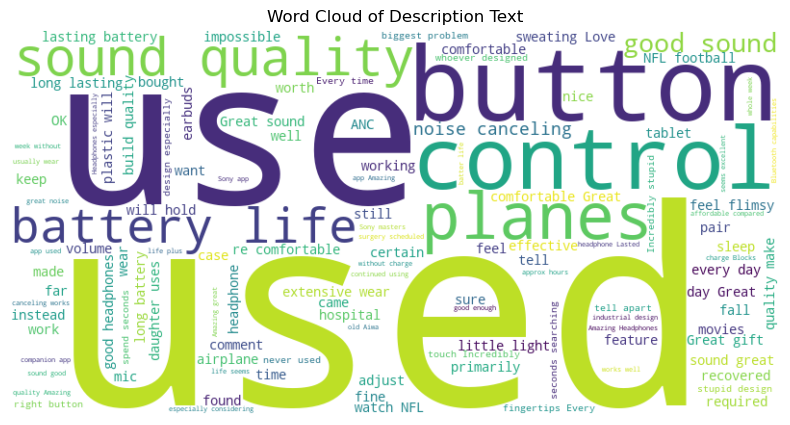

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Text')
plt.show()

In [21]:
title_all_reviews = ' '.join(df1['Title'].dropna())

title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_all_reviews)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

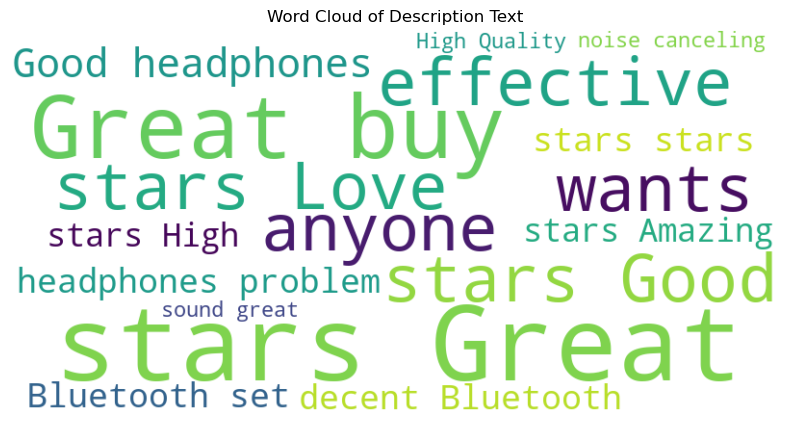

In [22]:
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Text')
plt.show()